In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
tr = pd.read_csv('train.csv')
tr.columns
tot_ppl = len(tr)
#tr

/Users/nmaghoul/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


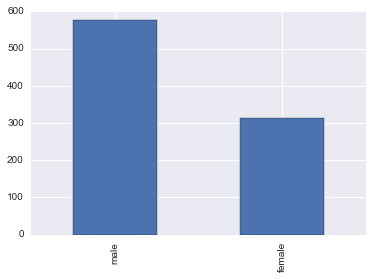

In [3]:
# Creating a new table with column data from "tr"
a = pd.DataFrame()
a['sex'] = tr['Sex']
a['age'] = tr['Age']
a['survived'] = tr['Survived']
a['fare'] = tr['Fare']
a['Class'] = tr['Pclass']
a.sex.value_counts().plot(kind='bar')
a.sex.value_counts()
b = a['survived']
# del a['survived'] ## Just incase
# Classify the sexes male == 0 and female == 1

a['sex'] = pd.get_dummies(a.sex)['female']


In [4]:
avgfare = np.mean(a.fare)

In [5]:
lesserfare = a[a.fare<avgfare]
higherfare = a[a.fare>=avgfare]
less_d = lesserfare[lesserfare.survived==0]
higher_d = higherfare[higherfare.survived==0]  
less_s = lesserfare[lesserfare.survived==1]
higher_s = higherfare[higherfare.survived==1]
# higherfare.survived.value_coutns()
# lower_income = len(lesserfare)
# Percentage of people 

In [6]:
print "The number of people who died on the lesser than average fare" 
print len(less_d)
print "The number of people who died on the higher than average fare" 
print len(higher_d)
print "The number of people who survived on the lesser than average fare"
print len(less_s)
print "The number of poeple who survived on the higher that average fare"
print len(higher_s)
# higher_avg
print "The total number of people on the ship was"
print len(less_d) + len(higher_d) + len(less_s) + len(higher_s)

The number of people who died on the lesser than average fare
464
The number of people who died on the higher than average fare
85
The number of people who survived on the lesser than average fare
216
The number of poeple who survived on the higher that average fare
126
The total number of people on the ship was
891


In [7]:
#plt.scatter(tr.Fare, tr.Survived)

In [8]:
tr[tr.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [9]:
Nofare = tr[tr.Fare==0]
#Nofare = Nofare[Nofare.survived==1]
#Nofare[Nofare.Survived==1]
#Nofare['Survived']



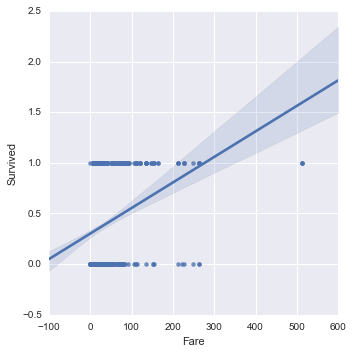

In [10]:
# Testing out seaborn package
sns.lmplot('Fare', 'Survived', data=tr, fit_reg=True)

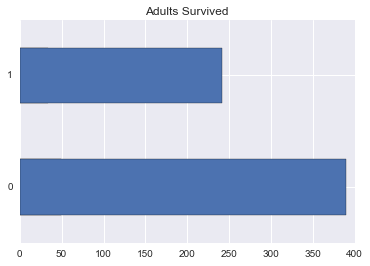

In [11]:
# Mortality of children vs adult
# Where childred < 16 and adults >= 16
adults = tr[tr.Age>=16]
children = tr[tr.Age<16]
# if you import seaborn is apparently automatically transcends the plt/plot function
tr[tr.Age<16].Survived.value_counts().plot(kind='barh', title = "Children Survived")
tr[tr.Age>=16].Survived.value_counts().plot(kind='barh', title = "Adults Survived")





In [12]:
# Pclass correlates to the class system 1>2>3
# Lets find out class vs survival 
a['Class'] = tr['Pclass'] 
class_1 = a[a.Class==1]
# sns.lmplot('Pclass','Survived', data=tr, fit_reg=False)


In [13]:
# Lets fill in the missing age
# First finding the std of each gender
#(a[a.sex==1]).std()
#(a[a.sex==0]).std()
# So I will fill in the nulls with the average age for each gender
## Average female age
#avg_age_f = (a[a.sex==1])['age'].mean()
## Average male age
#avg_age_m = (a[a.sex==0])['age'].mean()
## Overall average age
avg_age = a['age'].mean()

/Users/nmaghoul/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


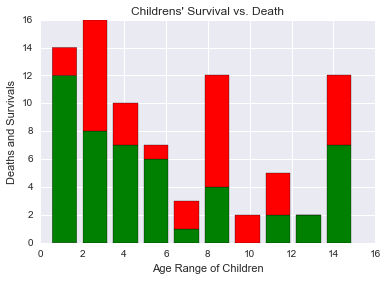

In [29]:
# Substituting all the NaN with the avg_age in the age column
a.age = a.age.fillna(value=avg_age)
m = len(a)
acs = pd.DataFrame()
acs['Age'] = a['age']
acs['Class'] = a['Class']
acs['Sex'] = a['sex']
acs['Survived'] = a['survived']
acs['Fare'] = a['fare']
minors_S = acs[(acs.Age<=15) & (acs.Survived == 1)]
adults_S = acs[(acs.Age>15) & (acs.Survived == 1)]
minors_D = acs[(acs.Age<=15) & (acs.Survived == 0)]
adults_D = acs[(acs.Age>15) & (acs.Survived == 0)]
# plt.scatter("Class", "Sex", data = minors_S)
import matplotlib.patches as mpatches
plt.hist([minors_S.Age, minors_D.Age], stacked=True, color=['g','r'])
plt.title("Childrens' Survival vs. Death")
plt.xlabel('Age Range of Children')
plt.ylabel('Deaths and Survivals')
#sns.lmplot(, 'Sex', data=acs, fit_reg=False)

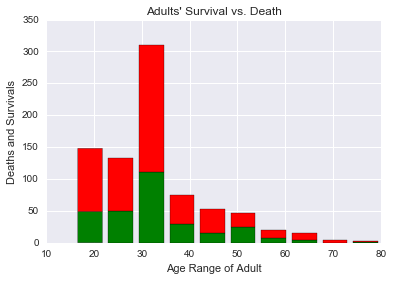

In [28]:
plt.hist([adults_S.Age, adults_D.Age], stacked=True, color=['g','r'])
plt.title("Adults' Survival vs. Death")
plt.xlabel('Age Range of Adult')
plt.ylabel('Deaths and Survivals')

TypeError: 'str' object is not callable

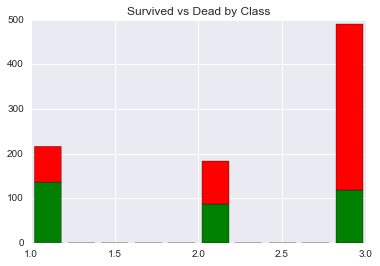

In [46]:
# Lets See fatalities by class
survived_class = acs[acs.Survived==1].Class
dead_class = acs[acs.Survived==0].Class
# print dead_class
plt.hist([survived_class, dead_class], stacked=True, color=['g','r'])
plt.title("Survived vs Dead by Class")
plt.xlabel('PClass System')
plt.ylabel("Survived vs Dead")

In [56]:
# We heard women and Children where the most likely survivors
# Women & Children Survived
CW_S = acs[(acs.Sex==1) & (acs.Age<=15)].Survived==1
CW_D = acs[(acs.Sex==1) & (acs.Age<=15)].Survived==0

([array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.]),
  array([ 43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  43.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

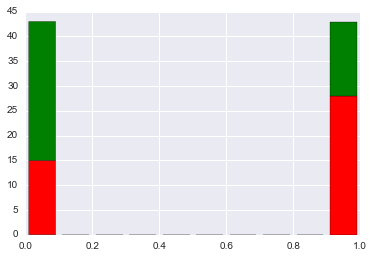